In [1]:
from games.tictactoe.tictactoe import TicTacToe
from base.agent import Agent
from agents.agent_random import RandomAgent
from agents.mcts import MonteCarloTreeSearch
from agents.minimax import MiniMax
import numpy as np
from collections import defaultdict
from base.game import AlternatingGame, AgentID
import matplotlib.pyplot as plt

In [2]:
game = TicTacToe(render_mode='')
game.reset()

In [11]:
def play(agents: dict[AgentID, tuple[str,Agent]], num_games: int):
    rewards = { agent_id: [] for agent_id in agents }

    for i in range(num_games):
        game = TicTacToe(render_mode='')
        game.reset()

        while not game.terminated():
            agent_id = game.agent_selection
            _, agent = agents[agent_id]

            # sobrescribo el juego dado que se crean nuevas instancias
            agent.game = game

            game.step(agent.action())

        for agent_id in game.agents:
            rewards[agent_id].append(game.reward(agent_id))
    
    games = np.arange(1, num_games + 1)
    for agent_id, (agent_name, agent) in agents.items():
        plt.plot(games, np.cumsum(rewards[agent_id]), label=agent_name)
    plt.legend()
    plt.xlabel('Juegos')
    plt.ylabel('Rewards acumulados')

### Random vs Minimax

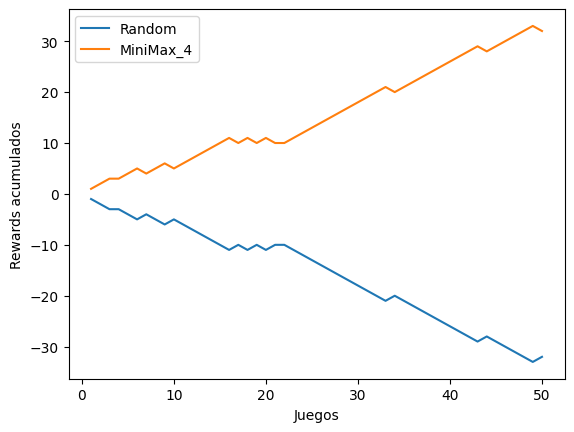

In [ ]:
play({
    game.agents[0]: ("Random", RandomAgent(game=game, agent=game.agents[0])),
    game.agents[1]: ("MiniMax_4", MiniMax(game=game, agent=game.agents[1], depth=4)),
}, 50)

### Random vs MCTS

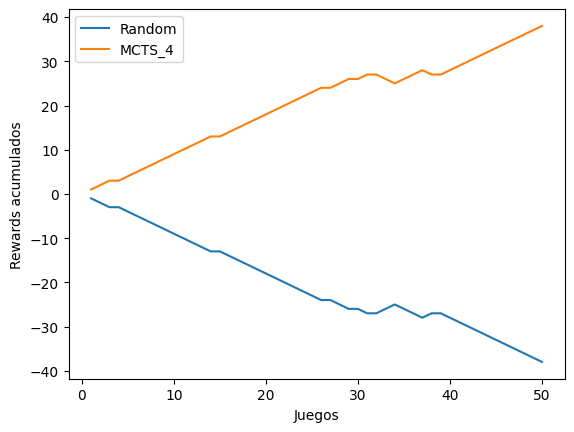

In [ ]:
play({
    game.agents[0]: ("Random", RandomAgent(game=game, agent=game.agents[0])),
    game.agents[1]: ("MCTS_4", MonteCarloTreeSearch(game=game, agent=game.agents[1], simulations=100, rollouts=5, max_depth=4)),
}, 50)

#### MiniMax depth=1 vs MCTS depth=6

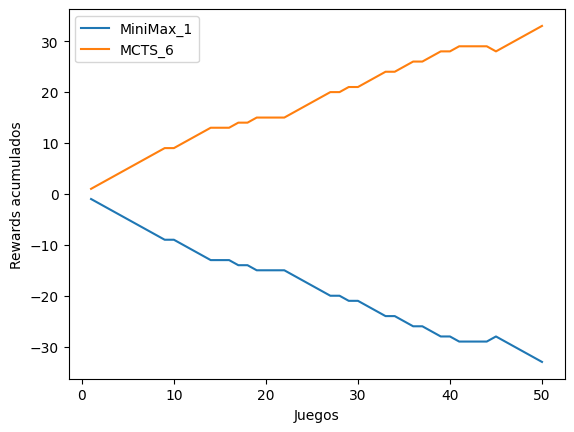

In [ ]:
play({
    game.agents[0]: ("MiniMax_1", MiniMax(game=game, agent=game.agents[0], depth=1)),
    game.agents[1]: ("MCTS_6", MonteCarloTreeSearch(game=game, agent=game.agents[1], simulations=100, rollouts=10, max_depth=6)),
}, 50)


#### MiniMax depth=4 vs MCTS depth=2

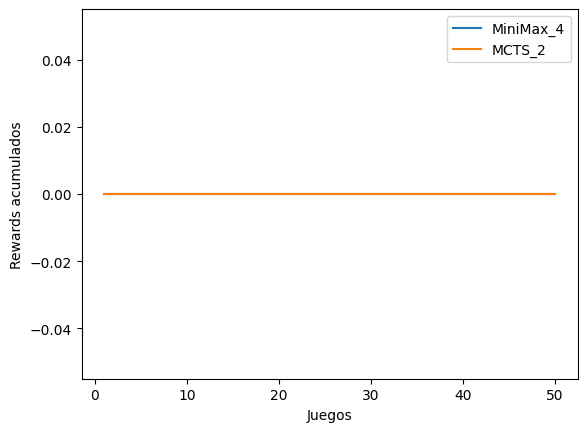

In [ ]:
play({
    game.agents[0]: ("MiniMax_4", MiniMax(game=game, agent=game.agents[0], depth=4)),
    game.agents[1]: ("MCTS_2", MonteCarloTreeSearch(game=game, agent=game.agents[1], simulations=100, rollouts=10, max_depth=2)),
}, 50)

#### MiniMax depth=4 vs MCTS depth=4

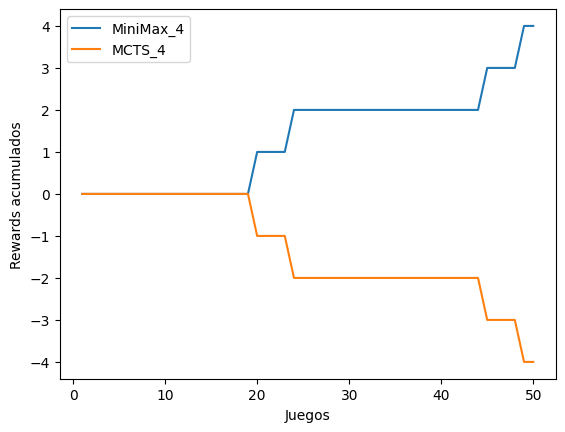

In [ ]:
play({
    game.agents[0]: ("MiniMax_4", MiniMax(game=game, agent=game.agents[0], depth=4)),
    game.agents[1]: ("MCTS_4", MonteCarloTreeSearch(game=game, agent=game.agents[1], simulations=100, rollouts=10, max_depth=4)),
}, 50)

#### MiniMax depth=4 vs MCTS depth=4, increase simulations

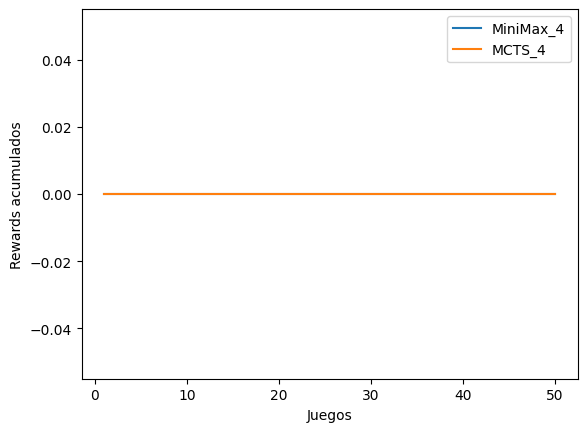

In [ ]:
play({
    game.agents[0]: ("MiniMax_4", MiniMax(game=game, agent=game.agents[0], depth=4)),
    game.agents[1]: ("MCTS_4", MonteCarloTreeSearch(game=game, agent=game.agents[1], simulations=300, rollouts=20, max_depth=4)),
}, 50)